# Research assignment 4


[your name] Luis Rubén González Márquez

[working title of the project] Time lenghth of conflict in Latin America under neoliberalism: assessing repression and placement effects

[date] 03/18/2020

## 1. Develop hypotheses about interactions between your independent variables [1 pt]

You can use the GSS data, Student aid data, or your own data

    A. Write at least two hypotheses involving at least 2 of the following types of interactions
        1) nominal * nominal
        2) nominal * interval-ratio
        3) interval-ratio * interval-ratio
        
        ** My first hypothesis of independent variables' interactions is about the effect of repression (nominal) and placement(nominal) over time lenght of social conflict in Latin America under neoliberalism
        ** My second hypothesis of independent variables' interactions is about the magnitude of lethal repressio (interval ratio) and placement (nominal) over time lenght of social conflict in Latin America under neoliberalism
        
    B. State the predicted direction of association between your dependent variable and:
        1) each of the 2 independent variables by themselves
        2) the interaction of the 2 indendent variables
        3) you can predict that there is no association
        
        Individual hypothesis:
        
        **Repression has the effect of increasing the time lenght of social conflict in Latin America under a neoliberal context, compared with the abscence of repression
        **The greater the magnitude of lethal repression (in terms of numbers of death) increases the time lenght of social conflict in Latin America under a neoliberal context
        **Compared to rural, urban and nationwide conflicts present longer time length in Latin America under a neoliberal context
        
        Interactional hypothesis:
        **The predicted length of social conflict in Latin America under a neoliberal context is greater when is more likely to be contained with repression and is placed in a urban setting
        **The predicted length of social conflict in Latin America under a neoliberal context is greater when the number of death increases and it is placed in a urban setting 
        
    C. Write a couple sentences about the theoretical reasons (prior knowledge / research) for each of your predictions
    The predictions are based in the ongoing discussion about the differences between urban and rural mobilization in Latin America, and the different responses to violent threats. Although it could be argued that in the long-run rural conflict has engaged in time-longer processes (because of the importance of traditional networks and of rural populations), other stress that the recent urbanization, the rise of the new poor, the institutional opportunities to demonstrate (through democratization processes) and the material resources concentrated in the cities make possible in the last years to sustain longer conflicts for urban population. Analyzing the interaction placement with forms of repression threats we will be able to assess whether the situation has effectively changed in the last years. 

## 2. Test your hypotheses [3 pts]

    A. For each hypothesized interactive relationship: use regression with the appropriate interaction syntax to estimate a 1 model with uninteracted variables and 1 model with interacted variables. Use --esttab-- with %html magic to output a model with the 2 tables
    
    B. Use margins and marginsplot with the appropriate syntax to visually represent your regression adjusted estimates for given nominal categories or at given interval-ratio values

In [1]:
qui set more off
qui capture log close
*qui log using researchassignment4_Rub_20200310.smcl
qui insheet using SCAD2018LatinAmerica_Final.csv, clear
qui keep if ndeath >=0
qui keep if locnum >=1
qui keep if locnum !=6
qui keep if ndeath <=100
qui keep if duration <=200
qui keep ndeath duration repress locnum
gen placem=.
replace placem=2 if locnum==1 
replace placem=2 if locnum==2
replace placem=2 if locnum==4
replace placem=1 if locnum==3
replace placem=1 if locnum==5
replace placem=3 if locnum==7
gen repression=.
replace repression=0 if repress==0
replace repression=1 if repress==1
replace repression=1 if repress==2











(4,990 missing values generated)

(1,884 real changes made)

(1,315 real changes made)

(228 real changes made)

(1,102 real changes made)

(137 real changes made)

(324 real changes made)

(4,990 missing values generated)

(4,147 real changes made)

(548 real changes made)

(295 real changes made)


In [2]:
label define placeme 1 "Rural" 2 "Urban" 3 "Nationwide"
label values placem placeme
label define repression 0 "No" 1 "Yes" 
tab placem locnum, m
tab duration placem





           |                              locnum
    placem |         1          2          3          4          5          7 |     Total
-----------+------------------------------------------------------------------+----------
     Rural |         0          0      1,102          0        137          0 |     1,239 
     Urban |     1,884      1,315          0        228          0          0 |     3,427 
Nationwide |         0          0          0          0          0        324 |       324 
-----------+------------------------------------------------------------------+----------
     Total |     1,884      1,315      1,102        228        137        324 |     4,990 


           |              placem
  duration |     Rural      Urban  Nationwid |     Total
-----------+---------------------------------+----------
         1 |     1,095      3,000        142 |     4,237 
         2 |        41        140         33 |       214 
         3 |        37         60         17 |  

In [30]:
quietly
set line 140
est clear
quietly eststo: reg duration i.repression i.placem
quietly eststo: reg duration i.repression##i.placem

In [31]:
%html
esttab, stats(r2 N, labels("R2" "N") fmt(%10.2fc %10.0fc)) cells(b(star fmt(3)) se(fmt(3)) N (fmt(%10.0fc)) r2 (fmt(%10.2f))) ///
  nobase noconstant starlevels(* .1 ** .05 *** .01) mlabels("Model 1" "Model 2") drop(_cons)  ///
  coeflabels (1.repression "Repression" 2.placem "Urban" 3.placem "Nationwide" 1.repression#2.placem "Urban conflict under repression" /// 
  1.repression#3.placem "Nationwide conflict repressed")  html

This front-end or document format cannot display HTML





  Variables that uniquely identify margins: placem repression


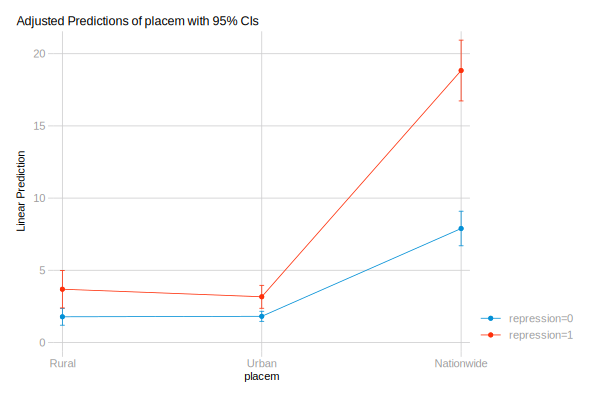







  Variables that uniquely identify margins: repression placem


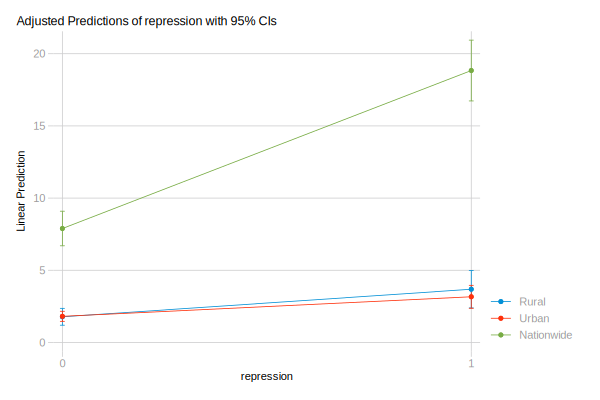

In [32]:
quietly eststo: reg duration i.repression##i.placem
quietly margins i.placem, over(repression) atmeans
marginsplot, scheme(538w)

quietly eststo: reg duration i.repression##i.placem 
quietly margins i.repression, over(placem) atmeans
marginsplot, scheme(538w)

In [26]:
est clear

quietly eststo: reg duration i.placem ndeath
quietly eststo: reg duration i.placem##c.ndeath
*Use logs only if they are normally distributed

In [27]:
%html
esttab, html noconstant stats(r2 N, labels("R2" "N") fmt(%10.2fc %10.0fc)) cells(b(star fmt(%10.2fc)) se(fmt(%6.2fc) par)) ///
  nobase starlevels(* .1 ** .05 *** .01) mlabels("Model 1" "Model 2") drop(_cons) ///
  coeflabels (2.placem "Urban conflict" 3.placem "Nationwide" ndeath "Number of death" ///
  2.placem#c.ndeath "Urban conflict * Number of death" 3.placem#c.ndeath "Nationwide * Number of death")
  

This front-end or document format cannot display HTML




  Variables that uniquely identify margins: ndeath placem


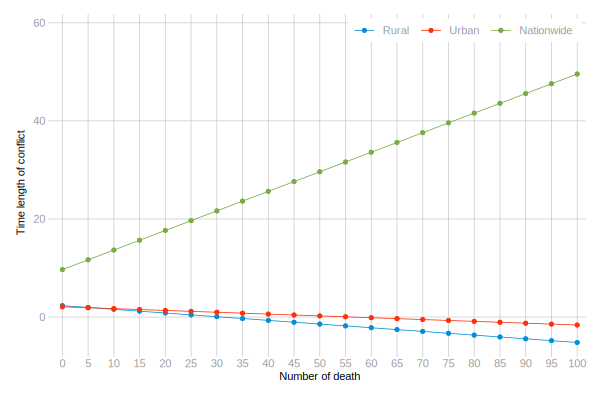

In [29]:
quietly margins placem, at(ndeath=(0(5)100)) atmeans
marginsplot, noci legend(on) title("") subtitle("") xtitle("Number of death") ///
  ytitle("Time length of conflict") legend(rows(1) position(1) ring(0)) scheme(538w)

## 3. Interpret your results [1 pt]

Write a couple sentences answering each of the following questions:

    A. Do the results support or contradict each of your hypotheses?
    The results of the tests and of the margins plot do not support my first hypothesis about the increasing effect of repression in urban setting over the duration of conflict. Neither does the result support my second hypothesis about the increasing effect of number of death in urban settings over time length of conflict. Actually, they suggest an alternative  hypothesis not-consider about the interactions of repression and nationwide conflicts over conflict duration.
    
    B. Why do the regression coefficients support or contradict your hypotheses? None of the coefficients of both tests presented statistical significance in the results when they refered to the specific interactions with urban conflicts. The effect of interaction between the appeareance of repression in urban conflict settings over time length of conflict was -.5, if compared with rural conflicts. While the effect of the interaction between the appereance of repression in conflicts settings and lethal repression .04, if compared with rural conflicts. The only interactions with statistical significance were those that involved nationwide mobilization in both tests. 
    
    C. Why do your regression adjusted estimates from margins for nominal categories or given interval-ratio values support or contradict your hypotheses?
    In the case of the first hypothesis, the margins contradict the first hypothesis by showing an slight reduction in time length of conflict if repression appears in interaction with an urban settings, compared with rural and nationwide settings. In the case of the second hypothesis, lethal repression seems to moderate this effect: the interaction of an urban setting and number of deaths over time length of conflicts places it above of rural conflicts. The problem is that the distance between the two values is not verty large, in contrast to nationwide conflicts.  
    